In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD

Using TensorFlow backend.


In [106]:
#Lectura de datos 
data = pd.read_csv('DEPURACION_FINAL.csv', sep=',')
data

,AÑO,MES,DIA,FECHA,HORA,KW-H
0,2015,1,jueves,1,0,3200
1,2015,1,jueves,1,1,3200
2,2015,1,jueves,1,2,2400
3,2015,1,jueves,1,3,2400
4,2015,1,jueves,1,4,2400
...,...,...,...,...,...,...
43819,2019,12,martes,31,19,3400
43820,2019,12,martes,31,20,3600
43821,2019,12,martes,31,21,3800
43822,2019,12,martes,31,22,4000


In [107]:
#Verificacion de nans 
data.isnull().values.any()
data.isnull().sum().sum()

data.isnull().sum()

AÑO      0
MES      0
DIA      0
FECHA    0
HORA     0
KW-H     0
dtype: int64

In [108]:
#Variable categrica DIA a numérica
data['DIA'] = data['DIA'].map({'lunes': 1 ,
                                           'martes': 2,
                                           'miercoles': 3,
                                           'miércoles': 3,
                                           'jueves': 4 , 
                                           'viernes': 5, 
                                           'sábado': 6,
                                           'sabado': 6,  #inconsistencia en la data por las tildes
                                           'domingo': 7})




In [109]:
data.tail(50)

,AÑO,MES,DIA,FECHA,HORA,KW-H
43774,2019,12,7,29,22,3200
43775,2019,12,7,29,23,2800
43776,2019,12,1,30,0,2400
43777,2019,12,1,30,1,2400
43778,2019,12,1,30,2,2000
43779,2019,12,1,30,3,2000
43780,2019,12,1,30,4,2000
43781,2019,12,1,30,5,2000
43782,2019,12,1,30,6,2000
43783,2019,12,1,30,7,1800


In [110]:
data_copy = data.copy()
data_copy



,AÑO,MES,DIA,FECHA,HORA,KW-H
0,2015,1,4,1,0,3200
1,2015,1,4,1,1,3200
2,2015,1,4,1,2,2400
3,2015,1,4,1,3,2400
4,2015,1,4,1,4,2400
...,...,...,...,...,...,...
43819,2019,12,2,31,19,3400
43820,2019,12,2,31,20,3600
43821,2019,12,2,31,21,3800
43822,2019,12,2,31,22,4000


In [111]:
#Llevamos la hora y la fecha para los indices porque lo que nos interesa es KW-H
from datetime import datetime 
data_final = pd.DataFrame()
fechas_dt = []
kwh_dt = []
for registro in data.values:
    fecha = "{}-{}-{} {}".format(registro[0], registro[1], registro[3], registro[4])
    fecha_dt = datetime.strptime(fecha, '%Y-%m-%d %H')
    fechas_dt.append(fecha_dt)
    kwh_dt.append(registro[5])
#Creamos un nuevo dataframe con el formato de fecha correcto y el valor de KW-H
data_final['FECHA'] = fechas_dt
data_final['KW-H'] = kwh_dt
data_final

,FECHA,KW-H
0,2015-01-01 00:00:00,3200
1,2015-01-01 01:00:00,3200
2,2015-01-01 02:00:00,2400
3,2015-01-01 03:00:00,2400
4,2015-01-01 04:00:00,2400
...,...,...
43819,2019-12-31 19:00:00,3400
43820,2019-12-31 20:00:00,3600
43821,2019-12-31 21:00:00,3800
43822,2019-12-31 22:00:00,4000


In [112]:
#Llevamos la FECHA al indice de nuestro df, ahora solo tenemos una columna de datos
data_final.set_index('FECHA', drop=True, inplace = True)
data_final

,KW-H
FECHA,
2015-01-01 00:00:00,3200
2015-01-01 01:00:00,3200
2015-01-01 02:00:00,2400
2015-01-01 03:00:00,2400
2015-01-01 04:00:00,2400
...,...
2019-12-31 19:00:00,3400
2019-12-31 20:00:00,3600
2019-12-31 21:00:00,3800


In [113]:
#Dividir los datos de entrenamiento y de test
# No se puede utilizar train test split, debemos dividir en el ultimo segmento 
#Tomamos los datos para validacion el 20%, pero del final de los datos
size = int(0.2*data_final.shape[0])
data_test = data_final[-size:]
data_train = data_final[:-size]
data_train


,KW-H
FECHA,
2015-01-01 00:00:00,3200
2015-01-01 01:00:00,3200
2015-01-01 02:00:00,2400
2015-01-01 03:00:00,2400
2015-01-01 04:00:00,2400
...,...
2018-12-31 15:00:00,2500
2018-12-31 16:00:00,2500
2018-12-31 17:00:00,2400


In [114]:
#Transformacion de datos a numerica

data_train['KW-H'] = [valor.replace(",", ".") for valor in data_train['KW-H'] ]
data_train['KW-H'] = [float(valor) for valor in data_train['KW-H'] ]

data_test['KW-H'] = [valor.replace(",", ".") for valor in data_test['KW-H'] ]
data_test['KW-H'] = [float(valor) for valor in data_test['KW-H'] ]

data_train

/Users/javiererazo/opt/anaconda3/envs/powerdemand/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/javiererazo/opt/anaconda3/envs/powerdemand/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/javiererazo/opt/anaconda3/envs/powerdemand/lib/python3.7/site-packages/ipykernel_launcher

,KW-H
FECHA,
2015-01-01 00:00:00,3200.0
2015-01-01 01:00:00,3200.0
2015-01-01 02:00:00,2400.0
2015-01-01 03:00:00,2400.0
2015-01-01 04:00:00,2400.0
...,...
2018-12-31 15:00:00,2500.0
2018-12-31 16:00:00,2500.0
2018-12-31 17:00:00,2400.0


In [117]:
#Normalizacion de los datos
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
data_train_scaled = sc.fit_transform(data_train)
print(data_train_scaled.shape)
data_train_scaled
 


(35060, 1)


array([[0.66666667],
       [0.66666667],
       [0.5       ],
       ...,
       [0.5       ],
       [0.47916667],
       [0.47916667]])

In [118]:
#Tenemos que entrenar la red por bloques de datos 
#Time_step es el tamaño del bloque 
#Cada n datos genera una salida 
#Tomamos bloques de 60 bloques consecutivos 
time_step = 60 
X_train = [] #Lista de conjuntos de 60 datos 
Y_train = []
m = len(data_train_scaled)
for i in range(time_step, m):
    X_train.append(data_train_scaled[i-time_step:i, 0]) #Guardamos 60 valores
    Y_train.append(data_train_scaled[i, 0]) #Buscamos predecir el dato time_step + 1, no la var KW
X_train, Y_train = np.array(X_train), np.array(Y_train) #Usamos np por reshape y optimizacion



In [119]:
X_train.shape, Y_train.shape

((35000, 60), (35000,))

In [120]:
#Obligatorio el reshape de los datos, es obligatorio por Keras
#Llevamos de dos a 3 dimensiones nuestro arreglo 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #Agregamos una nueva dimension
X_train.shape, Y_train.shape

((35000, 60, 1), (35000,))

In [121]:
#Parametros para el LSTM
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error


(60, 1)

In [123]:
dim_entrada

(60, 1)

In [125]:
#Este intento es con la fecha con index y todo refactorizado, con los parametros de la tesis 

dim_entrada = (X_train.shape[1],X_train.shape[2])
dim_salida = 1 
num_neuronas = 16


model = Sequential()
#Capa 1 
model.add(LSTM(units=num_neuronas, return_sequences = True, input_shape=dim_entrada))
#TODO posible dropout
#Capa 2
model.add(LSTM(units=8))

#capa de salida 
model.add(Dense(units = dim_salida))
model.compile(optimizer='rmsprop', loss='mse', metrics = ['mean_absolute_error']) #mean_squared_error

#Entrenamiento 
model.fit(X_train, Y_train, epochs = 20, batch_size = 128)

Epoch 1/20
35000/35000 [==============================] - 83s 2ms/step - loss: 0.0174 - mean_absolute_error: 0.0809
Epoch 2/20
35000/35000 [==============================] - 105s 3ms/step - loss: 0.0061 - mean_absolute_error: 0.0503
Epoch 3/20
35000/35000 [==============================] - 106s 3ms/step - loss: 0.0042 - mean_absolute_error: 0.0391
Epoch 4/20
35000/35000 [==============================] - 104s 3ms/step - loss: 0.0031 - mean_absolute_error: 0.0319
Epoch 5/20
35000/35000 [==============================] - 114s 3ms/step - loss: 0.0026 - mean_absolute_error: 0.0282
Epoch 6/20
35000/35000 [==============================] - 103s 3ms/step - loss: 0.0025 - mean_absolute_error: 0.0263
Epoch 7/20
35000/35000 [==============================] - 107s 3ms/step - loss: 0.0024 - mean_absolute_error: 0.0253
Epoch 8/20
35000/35000 [==============================] - 107s 3ms/step - loss: 0.0024 - mean_absolute_error: 0.0248
Epoch 9/20
35000/35000 [==============================] - 106s 3m

In [141]:
#Este intento es con la fecha con index y todo refactorizado, con los parametros de la tesis 

dim_entrada = (X_train.shape[1],X_train.shape[2])
dim_salida = 1 
num_neuronas = 16


model = Sequential()
#Capa 1 
model.add(LSTM(units=num_neuronas, return_sequences = True, input_shape=dim_entrada))
#TODO posible dropout
#Capa 2
model.add(LSTM(units=8))

#capa de salida 
model.add(Dense(units = dim_salida))
model.compile(optimizer='rmsprop', loss='mse', metrics = ['mean_absolute_error']) #mean_squared_error

#Entrenamiento 
model.fit(X_train, Y_train, epochs = 10, batch_size = 64)

ValueError: Error when checking target: expected dense_6 to have 3 dimensions, but got array with shape (35000, 1)

In [133]:
x_test  = data_test.values
x_test = sc.transform(x_test)
# # x_test
X_test = []
for i in range(time_step, len(x_test)):
    X_test.append(x_test[i-time_step: i, 0])
X_test= np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape
prediccion = model.predict(X_test)

In [134]:
prediccion = sc.inverse_transform(prediccion)

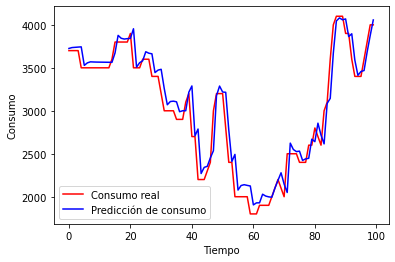

In [140]:
#Grafica de valores
# Y_test #Aun no defnido 
plt.plot(data_test.values[-100:], color='red', label='Consumo real')
plt.plot(prediccion[-100:], color='blue', label='Predicción de consumo')
plt.xlabel('Tiempo')
plt.ylabel('Consumo')
plt.legend()
plt.show()

In [ ]:
dim_entrada = (X_train.shape[1],X_train.shape[2])
dim_salida = 1 
num_neuronas = 48
dim_entrada

In [15]:
# tamano (35004, 60, 5) (35004,) # NO SIRVE -ESTE NO ES
#Nuevo tamano, solo entrenar con el KW-H

model = Sequential()
#Capa 1 
model.add(LSTM(units=num_neuronas, return_sequences = True, input_shape=dim_entrada))
#TODO posible dropout
#Capa 2
model.add(LSTM(units=24))

#capa de salida 
model.add(Dense(units = dim_salida))
model.compile(optimizer='rmsprop', loss='mse', metrics = ['mean_absolute_error']) #mean_squared_error

#Entrenamiento 
model.fit(X_train, Y_train, epochs = 20, batch_size = 128)

2022-01-17 08:00:58.962327: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-17 08:00:58.964218: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/20
35004/35004 [==============================] - 88s 3ms/step - loss: 0.0102 - mean_absolute_error: 0.0656
Epoch 2/20
35004/35004 [==============================] - 113s 3ms/step - loss: 0.0038 - mean_absolute_error: 0.0391
Epoch 3/20
35004/35004 [==============================] - 125s 4ms/step - loss: 0.0029 - mean_absolute_error: 0.0321
Epoch 4/20
35004/35004 [==============================] - 134s 4ms/step - loss: 0.0027 - mean_absolute_error: 0.0298
Epoch 5/20
35004/35004 [==============================] - 129s 4ms/step - loss: 0.0026 - mean_absolute_error: 0.0281
Epoch 6/20
35004/35004 [==============================] - 123s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0278
Epoch 7/20
35004/35004 [==============================] - 132s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0270
Epoch 8/20
35004/35004 [==============================] - 132s 4ms/step - loss: 0.0025 - mean_absolute_error: 0.0265
Epoch 9/20
35004/35004 [==============================] - 136s 4m

In [64]:
# #Resultados con el error de no meter todos los datos, tamano (35004, 60, 1) (35004,)
# model = Sequential()
# #Capa 1 
# model.add(LSTM(units=num_neuronas, return_sequences = True, input_shape=dim_entrada))
# #TODO posible dropout
# #Capa 2
# model.add(LSTM(units=num_neuronas))

# #capa de salida 
# model.add(Dense(units = dim_salida))
# model.compile(optimizer='rmsprop', loss='mse') #mean_squared_error

# #Entrenamiento 
# model.fit(X_train, Y_train, epochs = 20, batch_size = 128)

Epoch 1/20
35004/35004 [==============================] - 122s 3ms/step - loss: 0.0046
Epoch 2/20
35004/35004 [==============================] - 124s 4ms/step - loss: 0.0013
Epoch 3/20
35004/35004 [==============================] - 138s 4ms/step - loss: 8.9367e-04
Epoch 4/20
35004/35004 [==============================] - 141s 4ms/step - loss: 6.9120e-04
Epoch 5/20
35004/35004 [==============================] - 146s 4ms/step - loss: 5.7957e-04
Epoch 6/20
35004/35004 [==============================] - 140s 4ms/step - loss: 5.1116e-04
Epoch 7/20
35004/35004 [==============================] - 148s 4ms/step - loss: 4.4975e-04
Epoch 8/20
35004/35004 [==============================] - 151s 4ms/step - loss: 4.1095e-04
Epoch 9/20
35004/35004 [==============================] - 146s 4ms/step - loss: 3.7360e-04
Epoch 10/20
35004/35004 [==============================] - 149s 4ms/step - loss: 3.3797e-04
Epoch 11/20
35004/35004 [==============================] - 150s 4ms/step - loss: 3.1775e-04
Epoch

In [16]:
x_test  = data_test.values

x_test = sc.transform(x_test)
# x_test
X_test = []
for i in range(time_step, len(x_test)):
    X_test.append(x_test[i-time_step: i, -1])
X_test= np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape
prediccion = model.predict(X_test)



In [139]:
X_test[1:5, 0:5]


array([[[1.33333333, 0.        , 0.16666667, 0.        , 0.04347826,
         0.625     ],
        [1.33333333, 0.        , 0.16666667, 0.        , 0.08695652,
         0.625     ],
        [1.33333333, 0.        , 0.16666667, 0.        , 0.13043478,
         0.64583333],
        [1.33333333, 0.        , 0.16666667, 0.        , 0.17391304,
         0.64583333],
        [1.33333333, 0.        , 0.16666667, 0.        , 0.2173913 ,
         0.45833333]],

       [[1.33333333, 0.        , 0.16666667, 0.        , 0.08695652,
         0.625     ],
        [1.33333333, 0.        , 0.16666667, 0.        , 0.13043478,
         0.64583333],
        [1.33333333, 0.        , 0.16666667, 0.        , 0.17391304,
         0.64583333],
        [1.33333333, 0.        , 0.16666667, 0.        , 0.2173913 ,
         0.45833333],
        [1.33333333, 0.        , 0.16666667, 0.        , 0.26086957,
         0.47916667]],

       [[1.33333333, 0.        , 0.16666667, 0.        , 0.13043478,
         0.645833

In [17]:
prediccion = sc.inverse_transform(prediccion)

ValueError: non-broadcastable output operand with shape (8700,1) doesn't match the broadcast shape (8700,6)

In [142]:
prediccion[:10, 5]
prediccion[8000:, 5].shape

(700,)

In [19]:
Y_test = np.array(data_test['KW-H'])
Y_test[:10]

array([3000., 3000., 3000., 3100., 3100., 2200., 2300., 2200., 2200.,
       2200.])

In [29]:
prediccion[:100, :]

Y_train_scaled =[ data_train['KW-H']]
Y_train_scaled = sc.fit_transform(Y_train_scaled)
Y_train_scaled[:200, :]

array([[0., 0., 0., ..., 0., 0., 0.]])

In [31]:
#Grafica de valores
# Y_test #Aun no defnido 
plt.plot(Y_train_scaled[:200, :], color='red', label='Consumo real')
plt.plot(prediccion[:200, :], color='blue', label='Predicción de consumo')
plt.xlabel('Tiempo')
plt.ylabel('Consumo')
plt.legend()
plt.show()


/Users/javiererazo/opt/anaconda3/envs/powerdemand/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 386x525997 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [ ]:
#TODO hacer index a fecha y hora y entrenar solo con la cantidad de wats 